In [162]:
import numpy as np
from scipy.stats import entropy
import pandas as pd
import math
import matplotlib.pyplot as plt
import wooldridge as woo
import statsmodels.formula.api as smf

# Step 0 : We import the necessary files

In [163]:
dataFF_red_norm01 = pd.read_csv('dataFF_red_norm01.csv')
dataFF_red_norm_gauss = pd.read_csv('dataFF_red_norm_gauss.csv')

# Step 1 : We run first regressions

In [164]:
reg = smf.ols(formula='sum~ Nb_doct_8km', data=dataFF_red_norm_gauss)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

"""# scatter plot and fitted values:
plt.plot('APL', 'Nb_carac_présentation', data=dataFF_red_norm, color='grey', marker='o', linestyle='')
plt.plot(dataFF_red_norm['APL'], results.fittedvalues, color='black', linestyle='-')
plt.ylabel('Nb_caracteres_presentation')
plt.xlabel('APL')"""

b: 
Intercept     -0.304769
Nb_doct_8km    4.040997
dtype: float64



"# scatter plot and fitted values:\nplt.plot('APL', 'Nb_carac_présentation', data=dataFF_red_norm, color='grey', marker='o', linestyle='')\nplt.plot(dataFF_red_norm['APL'], results.fittedvalues, color='black', linestyle='-')\nplt.ylabel('Nb_caracteres_presentation')\nplt.xlabel('APL')"

In [165]:
# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     28.86
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           8.05e-08
Time:                        16:27:42   Log-Likelihood:                -23158.
No. Observations:                6333   AIC:                         4.632e+04
Df Residuals:                    6331   BIC:                         4.633e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3048      0.

In [166]:
reg = smf.ols(formula='sum~ Nb_doct_2km+Nb_doct_8km+Nb_doct_30km+Nb_doct_f_2km+Nb_doct_f_8km+Nb_doct_f_30km', data=dataFF_red_norm_gauss)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')


b: 
Intercept          -0.216022
Nb_doct_2km      -344.669726
Nb_doct_8km       -71.683344
Nb_doct_30km       -3.227782
Nb_doct_f_2km     624.205120
Nb_doct_f_8km     164.236922
Nb_doct_f_30km      2.981369
dtype: float64



In [167]:
# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')
#vote1.describe()

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     13.68
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           1.67e-15
Time:                        16:27:42   Log-Likelihood:                -23131.
No. Observations:                6333   AIC:                         4.628e+04
Df Residuals:                    6326   BIC:                         4.632e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.216

## Regression sur l'instrument

In [168]:
dataFF_red_norm01.columns

Index(['Unnamed: 0', 'Nb_Skills', 'Payment_method', 'Social_security_card',
       'site', 'Nb_charac_presentation', 'Nb_languages', 'nb_charac_card_1',
       'Transport', 'Parking', 'Contact', 'Without_appointment',
       'nb_terms_card_0', 'nb_terms_card_3', 'nb_terms_card_4',
       'nb_charac_card_0', 'nb_charac_card_3', 'nb_charac_card_4',
       'National_&_university_degrees', 'Other_formations_b', 'Experiences_b',
       'Formations_b', 'Work_&_publications_b', 'RPPS', 'Nb_price',
       'Min_price', 'Max_price', 'MED14', 'share_F',
       'Population standardisée par la consommation de soins par tranche d'âge',
       'Sector', 'Nb_doct_2km', 'Nb_doct_8km', 'Nb_doct_30km', 'Nb_doct_f_2km',
       'Nb_doct_f_8km', 'Nb_doct_f_30km', 'Nb_doct_D_2km', 'Nb_doct_D_8km',
       'Nb_doct_D_30km', 'Nb_doct_f_D_2km', 'Nb_doct_f_D_8km',
       'Nb_doct_f_D_30km', 'APL', 'Fibre', 'share_Doctolib'],
      dtype='object')

In [169]:
dataFF_red_norm01=dataFF_red_norm01.rename(columns={"Population standardisée par la consommation de soins par tranche d'âge": "Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age"})
dataFF_red_norm_gauss=dataFF_red_norm_gauss.rename(columns={"Population standardisée par la consommation de soins par tranche d'âge": "Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age"})

In [170]:
reg = smf.ols(formula='share_Doctolib~Fibre+share_F+Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age', data=dataFF_red_norm01)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept                                                                 4.517291e-01
Fibre                                                                    -2.655086e-01
share_F                                                                  -1.141919e-02
Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age   -8.325882e-07
dtype: float64



In [171]:
# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

latex_table = table.to_latex(index=True, header=True, column_format='lcccccc', float_format="%.4f")

print(latex_table)

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:         share_Doctolib   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     357.9
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          1.06e-214
Time:                        16:27:42   Log-Likelihood:                 1660.9
No. Observations:                6333   AIC:                            -3314.
Df Residuals:                    6329   BIC:                            -3287.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [172]:
# Convertir en DataFrame
summary_df = results.summary2().tables[0]  # La table des coefficients
type(summary_df)
# Générer le LaTeX à partir du DataFrame
latex_table = summary_df.to_latex()

# Afficher la table LaTeX
print(latex_table)


\begin{tabular}{lllll}
\toprule
 & 0 & 1 & 2 & 3 \\
\midrule
0 & Model: & OLS & Adj. R-squared: & 0.145 \\
1 & Dependent Variable: & share_Doctolib & AIC: & -3313.8247 \\
2 & Date: & 2024-10-23 16:27 & BIC: & -3286.8106 \\
3 & No. Observations: & 6333 & Log-Likelihood: & 1660.9 \\
4 & Df Model: & 3 & F-statistic: & 357.9 \\
5 & Df Residuals: & 6329 & Prob (F-statistic): & 1.06e-214 \\
6 & R-squared: & 0.145 & Scale: & 0.034674 \\
\bottomrule
\end{tabular}



the instrument is sufficiently strong/relevant to identify the endogenous variable if the first-stage f-statistic is larger than 10 and here F-statistic = 357.9, the instrument is then relevant

In [173]:
reg = smf.ols(formula='Nb_doct_D_30km~Fibre+MED14+share_F+Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age+APL', data=dataFF_red_norm01)
results = reg.fit()
b = results.params
#print(f'b: \n{b}\n')

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')


results.summary(): 
                            OLS Regression Results                            
Dep. Variable:         Nb_doct_D_30km   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     224.9
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          1.47e-221
Time:                        16:27:42   Log-Likelihood:                 17662.
No. Observations:                6333   AIC:                        -3.531e+04
Df Residuals:                    6327   BIC:                        -3.527e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [174]:
reg = smf.ols(formula='Nb_doct_30km~Fibre+share_F+Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age+APL', data=dataFF_red_norm01)
results = reg.fit()
b = results.params
#print(f'b: \n{b}\n')

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:           Nb_doct_30km   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     154.9
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          1.22e-126
Time:                        16:27:42   Log-Likelihood:                -158.44
No. Observations:                6333   AIC:                             326.9
Df Residuals:                    6328   BIC:                             360.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [175]:
#dataFF_red_norm_gauss['MED14']=dataFF_red_norm_gauss['MED14'].apply(lambda x : float(x.replace(',','.')))

In [176]:
reg = smf.ols(formula='Nb_doct_D_30km~Fibre+share_F+Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age+APL+MED14', data=dataFF_red_norm01)
results = reg.fit()
b = results.params
#print(f'b: \n{b}\n')

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

latex_table = table.to_latex(index=True, header=True, column_format='lcccccc', float_format="%.4f")

print(latex_table)

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:         Nb_doct_D_30km   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     224.9
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          1.47e-221
Time:                        16:27:43   Log-Likelihood:                 17662.
No. Observations:                6333   AIC:                        -3.531e+04
Df Residuals:                    6327   BIC:                        -3.527e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [177]:
# Convertir en DataFrame
summary_df = results.summary2().tables[0]  # La table des coefficients
type(summary_df)
# Générer le LaTeX à partir du DataFrame
latex_table = summary_df.to_latex()

# Afficher la table LaTeX
print(latex_table)

\begin{tabular}{lllll}
\toprule
 & 0 & 1 & 2 & 3 \\
\midrule
0 & Model: & OLS & Adj. R-squared: & 0.150 \\
1 & Dependent Variable: & Nb_doct_D_30km & AIC: & -35312.4084 \\
2 & Date: & 2024-10-23 16:27 & BIC: & -35271.8872 \\
3 & No. Observations: & 6333 & Log-Likelihood: & 17662. \\
4 & Df Model: & 5 & F-statistic: & 224.9 \\
5 & Df Residuals: & 6327 & Prob (F-statistic): & 1.47e-221 \\
6 & R-squared: & 0.151 & Scale: & 0.00022157 \\
\bottomrule
\end{tabular}



In [178]:
reg = smf.ols(formula='Nb_doct_D_30km~share_F+Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age+APL+MED14', data=dataFF_red_norm01)
results = reg.fit()
b = results.params
#print(f'b: \n{b}\n')

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:         Nb_doct_D_30km   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     280.6
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          1.91e-222
Time:                        16:27:43   Log-Likelihood:                 17661.
No. Observations:                6333   AIC:                        -3.531e+04
Df Residuals:                    6328   BIC:                        -3.528e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [179]:
dataFF_red_norm_gauss.columns

Index(['Unnamed: 0', 'Nb_Skills', 'Payment_method', 'Social_security_card',
       'site', 'Nb_charac_presentation', 'Nb_languages', 'nb_charac_card_1',
       'Transport', 'Parking', 'Contact', 'Without_appointment',
       'nb_terms_card_0', 'nb_terms_card_3', 'nb_terms_card_4',
       'nb_charac_card_0', 'nb_charac_card_3', 'nb_charac_card_4',
       'National_&_university_degrees', 'Other_formations_b', 'Experiences_b',
       'Formations_b', 'Work_&_publications_b', 'RPPS', 'Nb_price',
       'Min_price', 'Max_price', 'share_F',
       'Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age',
       'MED14', 'Sector', 'Nb_doct_2km', 'Nb_doct_8km', 'Nb_doct_30km',
       'Nb_doct_f_2km', 'Nb_doct_f_8km', 'Nb_doct_f_30km', 'Nb_doct_D_2km',
       'Nb_doct_D_8km', 'Nb_doct_D_30km', 'Nb_doct_f_D_2km', 'Nb_doct_f_D_8km',
       'Nb_doct_f_D_30km', 'APL', 'Fibre', 'share_Doctolib', 'sum'],
      dtype='object')

In [181]:
dataFF_red_norm_gauss.columns

Index(['Unnamed: 0', 'Nb_Skills', 'Payment_method', 'Social_security_card',
       'site', 'Nb_charac_presentation', 'Nb_languages', 'nb_charac_card_1',
       'Transport', 'Parking', 'Contact', 'Without_appointment',
       'nb_terms_card_0', 'nb_terms_card_3', 'nb_terms_card_4',
       'nb_charac_card_0', 'nb_charac_card_3', 'nb_charac_card_4',
       'National_&_university_degrees', 'Other_formations_b', 'Experiences_b',
       'Formations_b', 'Work_&_publications_b', 'RPPS', 'Nb_price',
       'Min_price', 'Max_price', 'share_F',
       'Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age',
       'MED14', 'Sector', 'Nb_doct_2km', 'Nb_doct_8km', 'Nb_doct_30km',
       'Nb_doct_f_2km', 'Nb_doct_f_8km', 'Nb_doct_f_30km', 'Nb_doct_D_2km',
       'Nb_doct_D_8km', 'Nb_doct_D_30km', 'Nb_doct_f_D_2km', 'Nb_doct_f_D_8km',
       'Nb_doct_f_D_30km', 'APL', 'Fibre', 'share_Doctolib', 'sum'],
      dtype='object')

In [183]:
import numpy as np
import pandas as pd
import linearmodels.iv as iv
import statsmodels.formula.api as smf

# IV automatically
reg_iv = iv.IV2SLS.from_formula(formula=' sum ~ 1 + [Nb_doct_30km ~ MED14] + share_F + np.log(Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age) + APL', data=dataFF_red_norm_gauss)
results_iv = reg_iv.fit()

# print regression table:
table_iv = pd.DataFrame({'b_auto': round(results_iv.params, 4),
                         'se_auto': round(results_iv.std_errors, 4),
                         't_auto': round(results_iv.tstats, 4)})
print(f'table_iv: \n{table_iv}\n')
latex_table = table_iv.to_latex(index=True, header=True, column_format='lrrr', float_format="%.4f")

print(latex_table)

table_iv: 
                                                     b_auto  se_auto   t_auto
Intercept                                          -22.2249   1.6184 -13.7324
share_F                                             -2.1799   0.8434  -2.5847
np.log(Population_standardisee_par_la_consommat...   2.2089   0.1681  13.1414
APL                                                 -0.3892   0.1295  -3.0048
Nb_doct_30km                                        19.3474   1.9791   9.7757

\begin{tabular}{lrrr}
\toprule
 & b_auto & se_auto & t_auto \\
\midrule
Intercept & -22.2249 & 1.6184 & -13.7324 \\
share_F & -2.1799 & 0.8434 & -2.5847 \\
np.log(Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age) & 2.2089 & 0.1681 & 13.1414 \\
APL & -0.3892 & 0.1295 & -3.0048 \\
Nb_doct_30km & 19.3474 & 1.9791 & 9.7757 \\
\bottomrule
\end{tabular}



In [188]:
import numpy as np
import pandas as pd
import linearmodels.iv as iv
import statsmodels.formula.api as smf

# IV automatically
reg_iv = iv.IV2SLS.from_formula(formula=' sum ~ 1 + [Nb_doct_D_8km ~ MED14] + share_F + Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age + APL', data=dataFF_red_norm_gauss)
results_iv = reg_iv.fit()

# print regression table:
table_iv = pd.DataFrame({'b_auto': round(results_iv.params, 4),
                         'se_auto': round(results_iv.std_errors, 4),
                         't_auto': round(results_iv.tstats, 4)})
print(f'table_iv: \n{table_iv}\n')
latex_table = table_iv.to_latex(index=True, header=True, column_format='lrrr', float_format="%.4f")

print(latex_table)

table_iv: 
                                                      b_auto  se_auto   t_auto
Intercept                                            -1.3774   0.4890  -2.8169
share_F                                              -0.7122   0.6139  -1.1602
Population_standardisee_par_la_consommation_de_...    0.0000   0.0000  11.9528
APL                                                  -0.3234   0.1149  -2.8145
Nb_doct_D_8km                                       394.4332  38.8901  10.1423

\begin{tabular}{lrrr}
\toprule
 & b_auto & se_auto & t_auto \\
\midrule
Intercept & -1.3774 & 0.4890 & -2.8169 \\
share_F & -0.7122 & 0.6139 & -1.1602 \\
Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age & 0.0000 & 0.0000 & 11.9528 \\
APL & -0.3234 & 0.1149 & -2.8145 \\
Nb_doct_D_8km & 394.4332 & 38.8901 & 10.1423 \\
\bottomrule
\end{tabular}



In [189]:
reg = smf.ols(formula='sum~share_F+Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age+APL+Nb_doct_D_8km', data=dataFF_red_norm_gauss)
results = reg.fit()
b = results.params
#print(f'b: \n{b}\n')

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     33.84
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           5.57e-28
Time:                        16:36:34   Log-Likelihood:                -23105.
No. Observations:                6333   AIC:                         4.622e+04
Df Residuals:                    6328   BIC:                         4.625e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [92]:
from numpy.linalg import matrix_rank

# Tester la colinéarité globale sur les instruments
instruments = dataFF_red_norm_gauss[['MED14', 'share_F', 'APL', 'Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age']]
rank = matrix_rank(instruments.values)
print("Rang de la matrice des instruments :", rank)

Rang de la matrice des instruments : 4


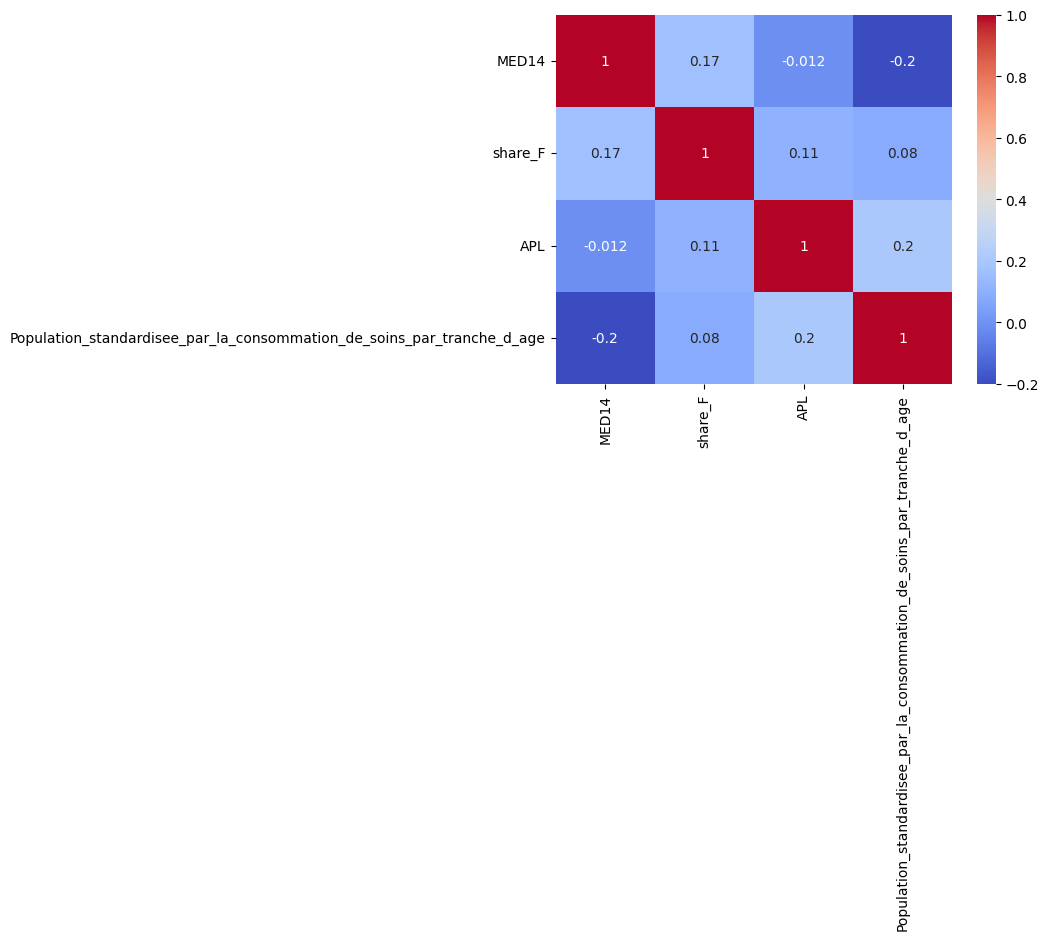

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = dataFF_red_norm_gauss[['MED14', 'share_F', 'APL', 'Population_standardisee_par_la_consommation_de_soins_par_tranche_d_age']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()